# Student Score Analysis

#### By Karan Agarwal

### Objective:
The objective of this case study is to anaylyse scores of the students in their various subjects as well as factors affecting such scores like their gender, whether they were doing any part time job, whether they were indulged in any extra-curricular activities, their absence from the college, their self study hours and what do they aspire to become.

## Step 1: Importing Libraries and Loading the Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Making matplotlib plots directly visible in the notebook
%matplotlib inline

#Setting Seaborn's default plotting style to "whitegrid" for white background and grid lines
sns.set(style = "whitegrid")

#Loading the Dataset
df = pd.read_csv(r"C:\Users\karan\OneDrive\Desktop\Student Scores.csv")

#Displaying the top 5 rows
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


#### Observation:
The dataset appears correctly loaded wit 17  columns including id, first_name, last_name, email, gender, part_time_job, absence_days, extracurricular_activities, weekly_self_study_hours, career_aspiration, and scores in 7 subjects..

## Step 2: Basic Structure, Shape & Dataset Information

### 2.1 Shape of Dataset -- No. of Rows and No. of Columns

In [9]:
df.shape

(2000, 17)

#### Observation:There are 2000 rows and 17 columns in the dataset.

A sample size of 2000 students is large enough to perform meaningful statistical analysis and uncover trends with good reliability..

### 2.2 Column Names

In [12]:
df.columns.tolist()

['id',
 'first_name',
 'last_name',
 'email',
 'gender',
 'part_time_job',
 'absence_days',
 'extracurricular_activities',
 'weekly_self_study_hours',
 'career_aspiration',
 'math_score',
 'history_score',
 'physics_score',
 'chemistry_score',
 'biology_score',
 'english_score',
 'geography_score']

#### Observation:
The dataset contains the following columns:
['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job', 'absence_days', 'extracurricular_activities', 'weekly_self_study_hours', 'career_aspiration', 'math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score' ]

### 2.3 Information Regarding the Dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

#### Observation:
-> The Dataset has no missing values ( All 2000 entries are present in every column). The absence of missing values suggests that the dataset is pre-cleaned and likely synthetic or curated for educational analysis.

-> There are 5 categorical columns (object type), 10 numerical columns (int64 type) and 2 boolean types ( bool ) of columns are there.ysis.

### 2.4 Checking Missing Values

In [18]:
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

#### Observation:No missing values were found. Therefore, we can proceed directly to exploratory analysis without imputation steps..

### 2.5 Value Counts Category Wise

In [21]:
for col in ['gender', 'part_time_job', 'extracurricular_activities', 'career_aspiration']:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for gender:
gender
female    1002
male       998
Name: count, dtype: int64

Value counts for part_time_job:
part_time_job
False    1684
True      316
Name: count, dtype: int64

Value counts for extracurricular_activities:
extracurricular_activities
False    1592
True      408
Name: count, dtype: int64

Value counts for career_aspiration:
career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64


#### Observation:

-> The gender distribution is almost perfectly balanced (1002 females, 998 males), eliminating gender imbalance bias from the dataset.

-> 316 students (15.8%) work part-time, indicating a minority group that can be used for comparative performance analysis.

-> 408 students (20.4%) participate in extracurricular activities — this could be compared with scores or absence patterns later.

-> Very diverse set of 17 career aspirations. “Software Engineer” and “Business Owner” are the most common. “Unknown” accounts for 223 students who did not declare a preference.

#### Overall **Insights**:

1. The Dataset has 2000 rows and 17 columns.

2. The Dataset has no missing values, therefore, it is clean and ready to use.

3. The dataset has an almost perfectly balanced gender ratio, which helps in reducing gender-related sampling bias.

4. About 15% students were found to be working part-time and 20% students were indulged in extracurricular activities.

5. A wide variety of career aspiration was found among the students. 

## Step 3: Data Cleaning & Feature Engineering

### 3.1 Duplicated Rows

In [26]:
df.duplicated().sum()

0

#### Observation:
No duplicate rows were found. This confirms that each record represents a unique student, and no deduplication is required.

### 3.2 Statistical Summary ( Numerical Columns Only )

In [29]:
df[['absence_days', 'weekly_self_study_hours', 'math_score', 'history_score', 
     'physics_score', 'chemistry_score', 'biology_score', 'english_score', 
     'geography_score']].describe().loc[['mean', 'std', 'min', 'max']].round(2)

,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
mean,3.67,17.76,83.45,80.33,81.34,80.00,79.58,81.28,80.89
std,2.63,12.13,13.22,12.74,12.54,12.78,13.72,12.03,11.64
min,0.00,0.00,40.00,50.00,50.00,50.00,30.00,50.00,60.00
max,10.00,50.00,100.00,100.00,100.00,100.00,100.00,99.00,100.00


#### Observation:
##### Attendance ->
With an average of 3.67 days absent and a low standard deviation (2.63), most students have consistent attendance. Outliers are unlikely.

##### Self Study Hours->
Students study an average of ~ 18 hours/week, but the high standard deviation (12.13) indicates large variation — some study very little, some excessively.

##### Subject Scores->
All subjects show consistent scoring patterns (mean ~ 80, SD ~ 12–13). This suggests no subject is unusually difficult or unusually easy for most students.

### 3.3 Unique Values in Each Column

In [32]:
df.nunique()

id                            2000
first_name                     453
last_name                      707
email                         2000
gender                           2
part_time_job                    2
absence_days                    11
extracurricular_activities       2
weekly_self_study_hours         50
career_aspiration               17
math_score                      61
history_score                   51
physics_score                   50
chemistry_score                 51
biology_score                   68
english_score                   50
geography_score                 41
dtype: int64

#### Observation:
##### Identifiers ->

id and email have 2000 unique values, confirming every student is uniquely represented.

##### Names -> 

first_name has 453 unique entries, last_name has 707, showing diversity but also repetition (common names and surnames).

##### Categorical Variables -> 

gender has 2 categories → male, female.

part_time_job and extracurricular_activities have 2 categories each → True/False.

career_aspiration has 17 unique values, showing strong diversity in career choices.

##### Numerical Behavioral Variables -> 

absence_days has only 11 possible values (0–10) — makes sense for count data.

weekly_self_study_hours has 50 unique levels → continuous-like variable.

##### Score Variables -> 

All 7 subject scores have 40–70 unique values — indicating scores were probably randomly generated or based on a wide scoring range.

### 3.4 Feature Engineering

#### 3.4.1 Total Score per Student

In [36]:
score_cols = ['math_score', 'history_score', 'physics_score', 
              'chemistry_score', 'biology_score', 'english_score', 'geography_score']

df['total_score'] = df[score_cols].sum(axis=1)

#### 3.4.2 Average Score per Student

In [38]:
df['average_score'] = df[score_cols].mean(axis=1).round(2)

#### 3.4.3 Subject wise Averages

##### (A) Science Stream ( Physics, Chemistry, Biology )

In [41]:
df['science_average'] = df[['physics_score','chemistry_score','biology_score']].mean(axis=1).round(2)

##### (B) Humanities ( History, Geography, English )

In [43]:
df['humanities_average'] = df[['history_score','geography_score','english_score']].mean(axis=1).round(2)

##### (C) Logical ( Maths, Physics )

In [45]:
df['quant_average'] = df[['math_score','physics_score']].mean(axis=1).round(2)

##### Intuition:
This allows insights like:

• Do part-time workers perform better in humanities than science?

• Do students who attend extracurricular activities perform better in humanities?

#### 3.4.4 Performance Category ( High, Medium, Low)

In [48]:
def performance_category(avg):
    if avg >= 85:
        return "High"
    elif avg >= 70:
        return "Medium"
    else:
        return "Low"

df['performance_category'] = df['average_score'].apply(performance_category)

##### Intuition:
Helps analyze performance distribution across gender, part-time job status, study hours, etc.

#### 3.4.5 Study-efficiency metric

In [51]:
df['score_per_study_hour'] = (df['total_score'] / (df['weekly_self_study_hours'] + 1)).round(2)

##### Intuition:
Shows which students perform well even with fewer study hours (efficiency).

### Intuition behind Feature Engineering:
New metrics such as total scores, average scores, stream-wise averages, quant ability, performance categories, and study efficiency were engineered.

These features transform the dataset from raw marks into structured analytical variables, enabling deeper insights during exploratory data analysis.

They will allow us to compare performance across gender, study habits, extracurriculars, part-time job status, and aspirations.

#### Dataset after adding the Feature Engineering

In [55]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,...,biology_score,english_score,geography_score,total_score,average_score,science_average,humanities_average,quant_average,performance_category,score_per_study_hour
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,...,63,80,87,574,82.00,84.33,82.67,83.0,Medium,20.50
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,...,90,88,90,640,91.43,95.33,88.00,93.0,High,13.33
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,...,65,77,94,605,86.43,85.33,89.33,88.0,High,43.21
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,...,89,63,86,551,78.71,85.67,74.33,79.5,Medium,137.75
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,...,80,74,76,521,74.43,70.00,75.67,74.5,Medium,47.36


## Step 4: Visual Analysis

### 4.1: Univariate Analysis

#### 4.1.1 Score distributions

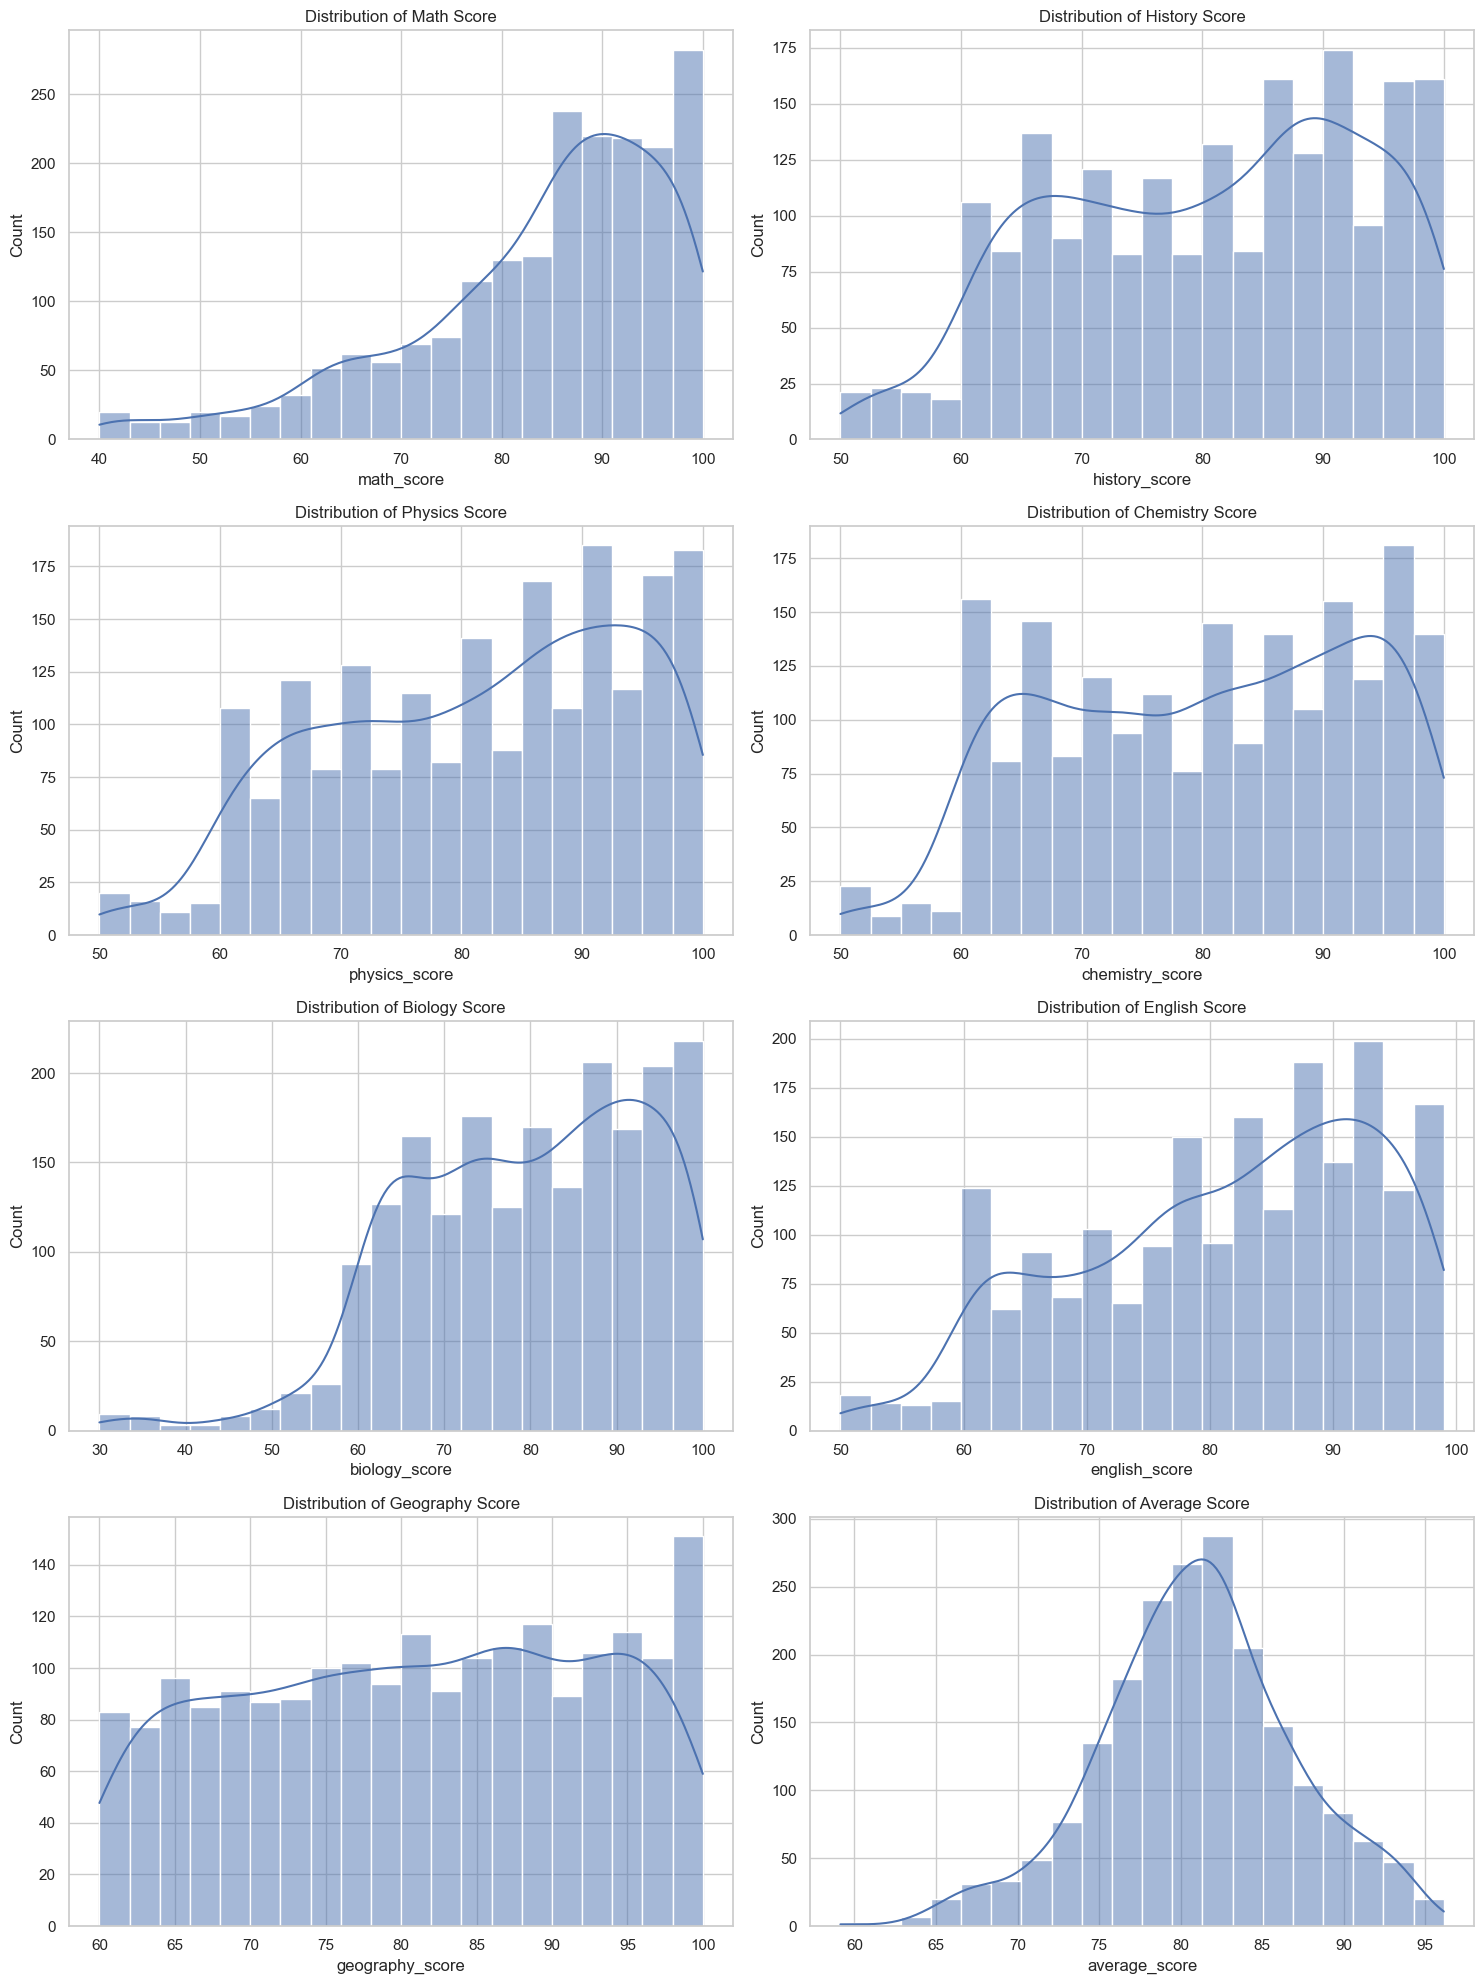

In [59]:
score_cols = ['math_score', 'history_score', 'physics_score', 'chemistry_score',
              'biology_score', 'english_score', 'geography_score', 'average_score']

plt.figure(figsize=(15, 20))

for i, col in enumerate(score_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### Observations:
##### 1. Math Score Distribution

The math score distribution is left-skewed, indicating that a large number of students score on the higher end (80–100). Very few students score below 60. This suggests that math is a relatively easier subject in this dataset, or students generally perform well in it.

##### 2. History Score Distribution

History scores show a gentle rise toward higher values, with many students scoring between 85–100. The distribution has a mild left skew. There are no extreme lows, indicating strong and consistent performance across the student group.

##### 3. Physics Score Distribution

Physics scores also show a left-skewed pattern, with a majority of students performing well (80–100). The distribution is slightly flatter compared to math/history, indicating more spread but the same overall trend of high performance.

##### 4. Chemistry Score Distribution

Chemistry exhibits one of the most uniform distributions, but still trends upward toward the high-score range. Scores are widely spread across 60–100, but again many students cluster near the upper end. No significant outliers are visible.

##### 5. Biology Score Distribution

Biology has a left-skewed distribution with high clustering between 75–100. The tail shows very few low performers. This indicates that biology is one of the strongest scoring subjects overall.

##### 6. English Score Distribution

English scores are fairly evenly spread across the range, though still with a noticeable rise toward higher values. The distribution is less smooth, indicating slightly more variability, but overall students perform strongly.

##### 7. Geography Score Distribution

Geography scores are widely distributed with multiple small peaks, but still lean toward the higher score region. This variance suggests that performance is more heterogeneous here compared to other subjects.

##### 8. Average Score Distribution

The average score distribution is almost perfectly bell-shaped, centered around 80–85. This confirms that combining multiple subjects smooths out individual variations. Most students fall into a strong and consistent performance bracket, with very few very low or very high extremes.

##### Overall Interpretation for Score Distributions:

Across all seven subjects, score distributions show a consistent trend: most students score in the 75–100 range, indicating strong academic performance overall. Individual subjects tend to be left-skewed, meaning high scores are more common than low scores. The average_score distribution is normal-like, showing the central tendency of multi-subject performance. No extreme outliers or anomalies were detected.

#### 4.1.2 Distribution of Behavioral Variables

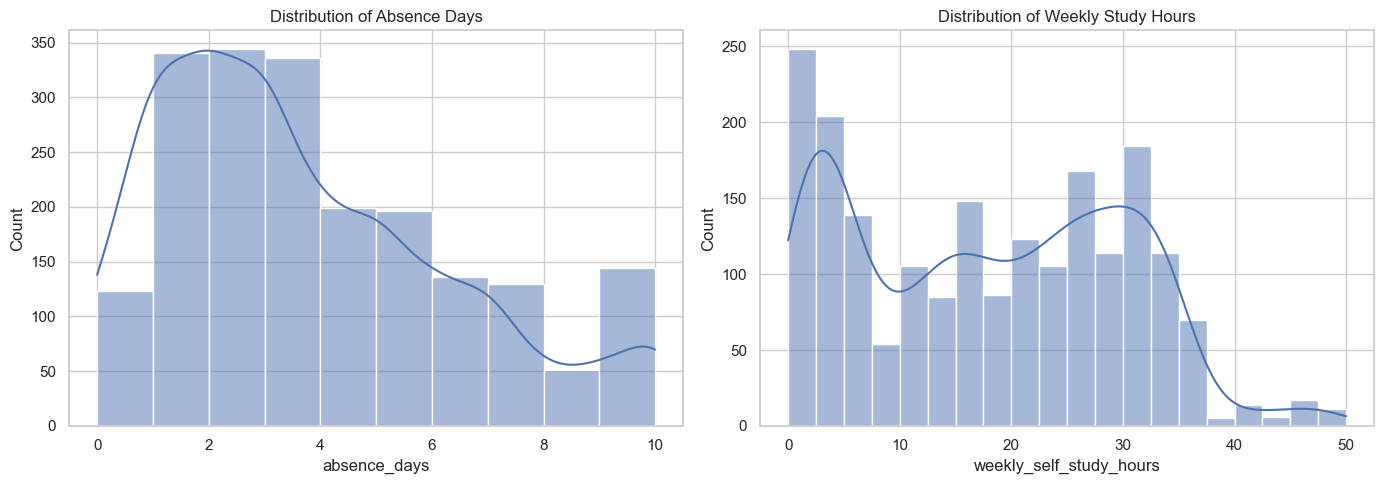

In [62]:
plt.figure(figsize=(14, 5))

# Absence Days
plt.subplot(1, 2, 1)
sns.histplot(df['absence_days'], bins=10, kde=True)
plt.title("Distribution of Absence Days")
plt.xlabel("absence_days")

# Study Hours
plt.subplot(1, 2, 2)
sns.histplot(df['weekly_self_study_hours'], bins=20, kde=True)
plt.title("Distribution of Weekly Study Hours")
plt.xlabel("weekly_self_study_hours")

plt.tight_layout()
plt.show()

#### Observation:
##### Distribution of Absence Days:
The distribution of absence days is right-skewed, showing that most students are absent between 1 and 4 days. The frequency declines steadily after 5 days, and only a small minority have unusually high absence levels (8–10 days). Overall, the dataset reflects strong attendance patterns, with no significant attendance-related anomalies.


##### Distribution of Weekly Self Study Hours:
Weekly self-study hours exhibit a wide and uneven distribution, ranging from 0 to 50 hours. The distribution shows a right skew, with a noticeable concentration in the 10–30 hour range, while both extremes (0–5 hours and 40–50 hours) contain far fewer students. This indicates substantial variability in study habits, suggesting that students follow highly individualized study routines. A few outliers exist at both ends, but they are not extreme enough to distort the overall distribution.

##### Overall:
Overall, the behavioral variables reveal clear patterns: students maintain consistent attendance, but their self-study habits vary widely. This variation in study behavior is likely to have a meaningful relationship with academic performance and will be explored in the upcoming bivariate analyses.

#### 4.1.3 Categorical Variable Distributions:

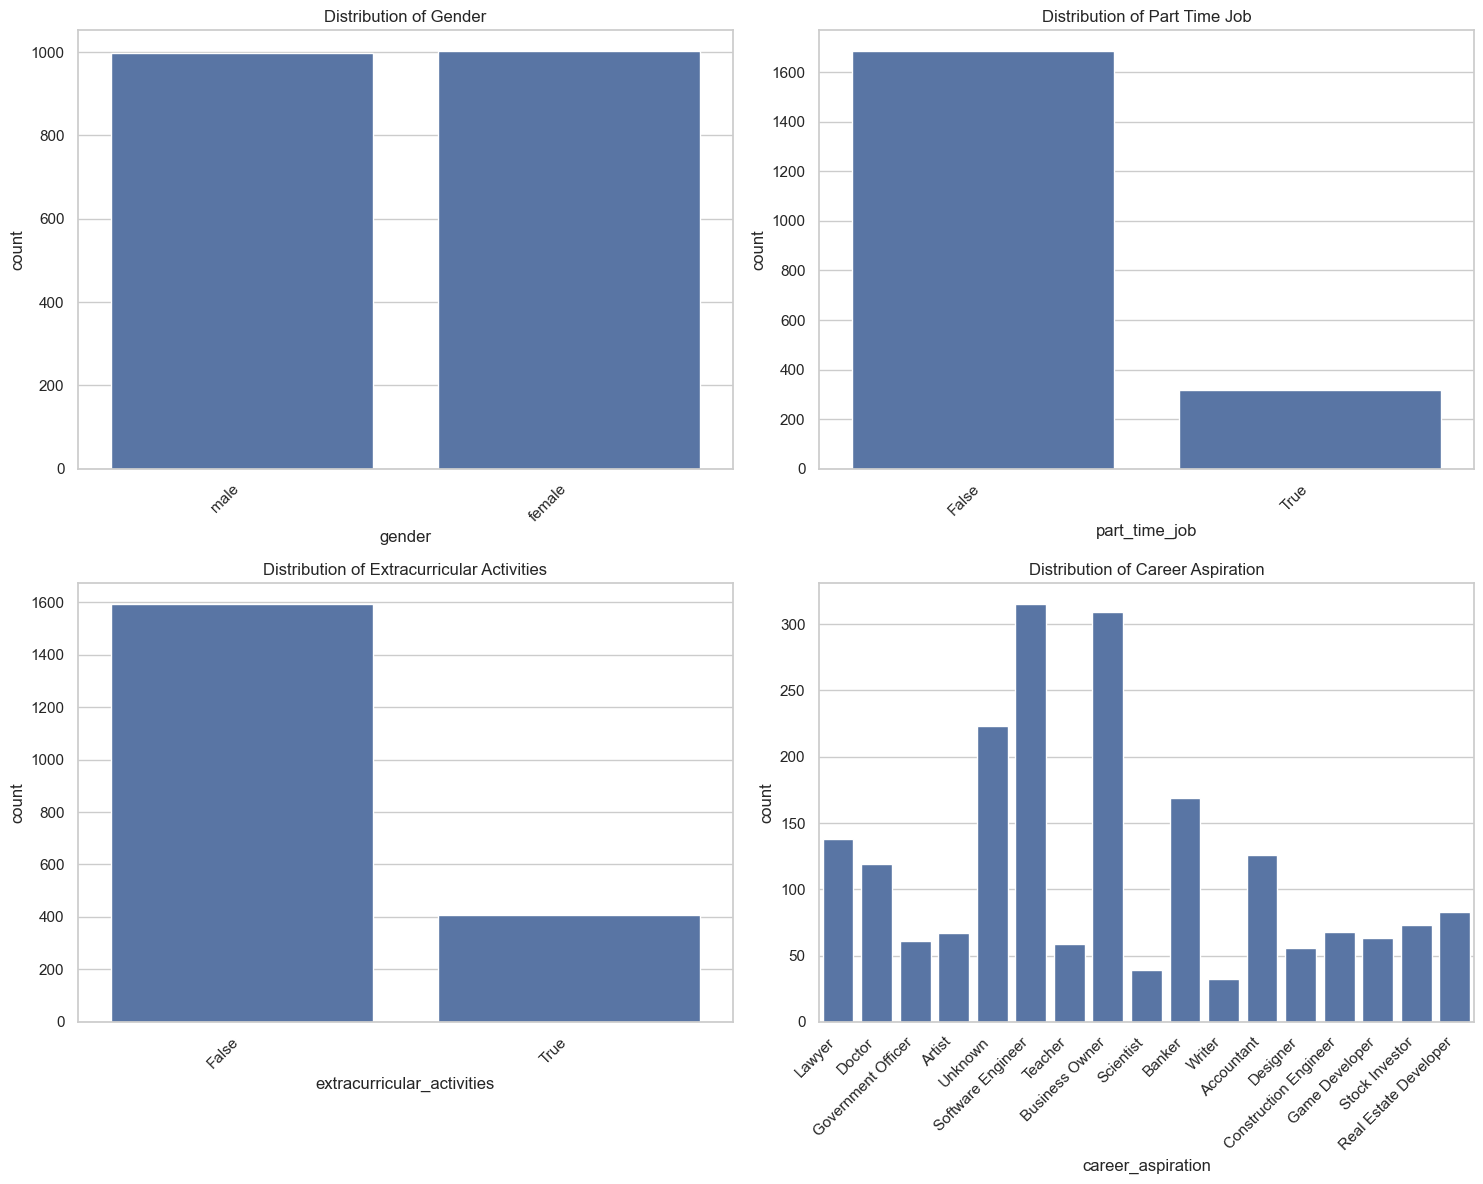

In [65]:
categorical_cols = ['gender', 'part_time_job', 'extracurricular_activities', 'career_aspiration']

plt.figure(figsize=(15,12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data= df, x= col)
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    plt.xticks(rotation= 45, ha= 'right')

plt.tight_layout()
plt.show()

#### Observation:
##### 1. Distribution of Gender

The gender distribution plot shows an almost perfectly balanced population, with both male and female students represented in nearly equal proportions. This balance ensures that subsequent gender-based comparisons will not suffer from sampling bias.

##### 2. Distribution of Part-Time Job

The majority of students do not work part-time, as shown by the strong dominance of the “False” category in the plot. The “True” category appears much smaller, indicating that only a minority of students balance academics with part-time work.


##### 3. Distribution of Extracurricular Activities

The plot shows that most students are not engaged in extracurricular activities, with the “False” bar significantly higher than the “True” bar. This creates a clear majority–minority pattern, which may influence performance trends later.

##### 4. Distribution of Career Aspirations

The career aspiration distribution is highly varied, showing a long-tailed categorical pattern. A few aspirations such as Software Engineer and Business Owner dominate the chart, while many other aspirations appear in much smaller numbers. This indicates a diverse set of ambitions among students, with some categories being niche or less common.

##### Overall Summary:

The categorical variables show a balanced gender distribution but clear skews in other categories such as part-time job status and extracurricular participation. Career aspirations display high diversity with a few dominant choices. These patterns will be valuable when analyzing performance differences across demographic and behavioral segments.

### Step 4.2: Bivariate Analysis

#### 4.2.1 Gender v/s Average Score

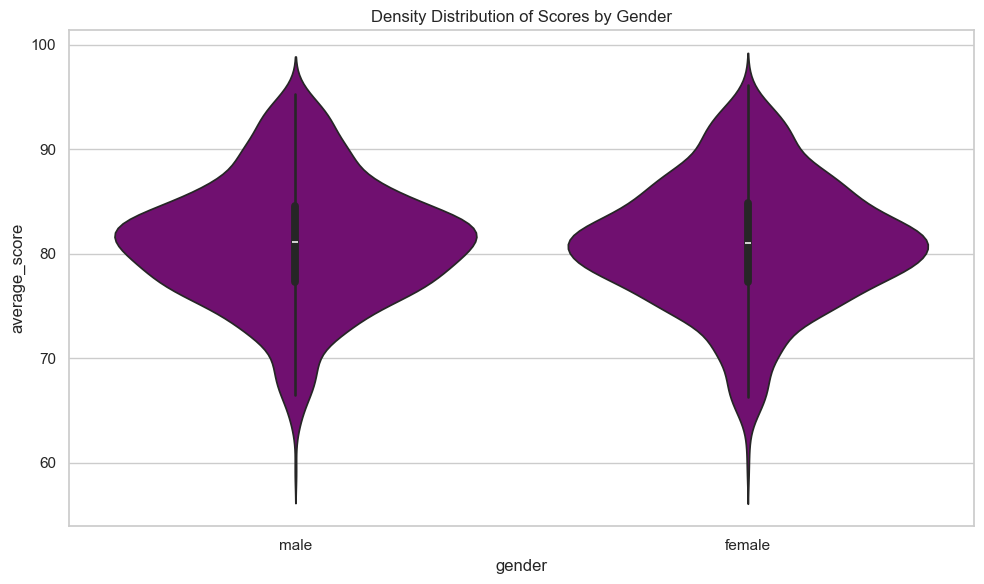

In [69]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='gender', y='average_score', color= 'purple')
plt.title("Density Distribution of Scores by Gender")
plt.tight_layout()
plt.show()

#### Observation:
The violin plots for male and female students show almost identical score distributions, with similar medians, spreads, and density shapes. This indicates that gender does not have a significant influence on academic performance in this dataset. Both groups display comparable variability and central tendencies, suggesting no meaningful performance difference between male and female students.

#### 4.2.2 Part-time Job vs Average Score

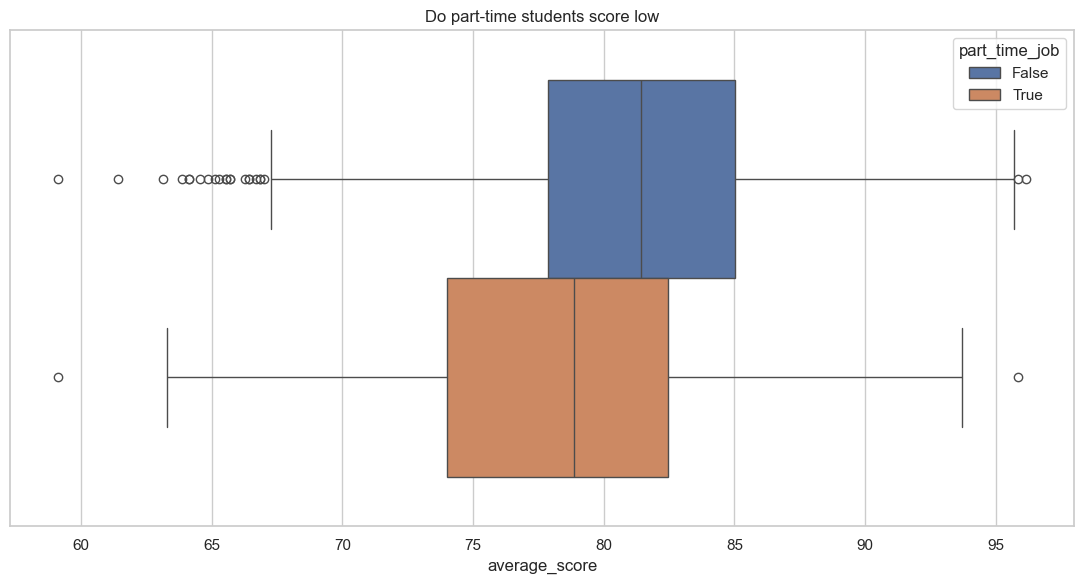

In [72]:
plt.figure(figsize=(11,6))
sns.boxplot(data= df, x='average_score', hue='part_time_job')
plt.title("Do part-time students score low")
plt.tight_layout()
plt.show()

#### Observation:
The boxplot shows a noticeable difference in performance between the two groups. Students not working part-time have a higher median average score and a tighter interquartile range, indicating more consistent performance.

Students who work part-time show a lower median score and a wider spread, suggesting greater variability and slightly weaker performance on average.

Although some high-performing outliers exist among both groups, the overall trend suggests that part-time work is associated with slightly lower academic performance, likely due to reduced study time or increased workload.

#### 4.2.3 Weekly Study Hours vs Average Score

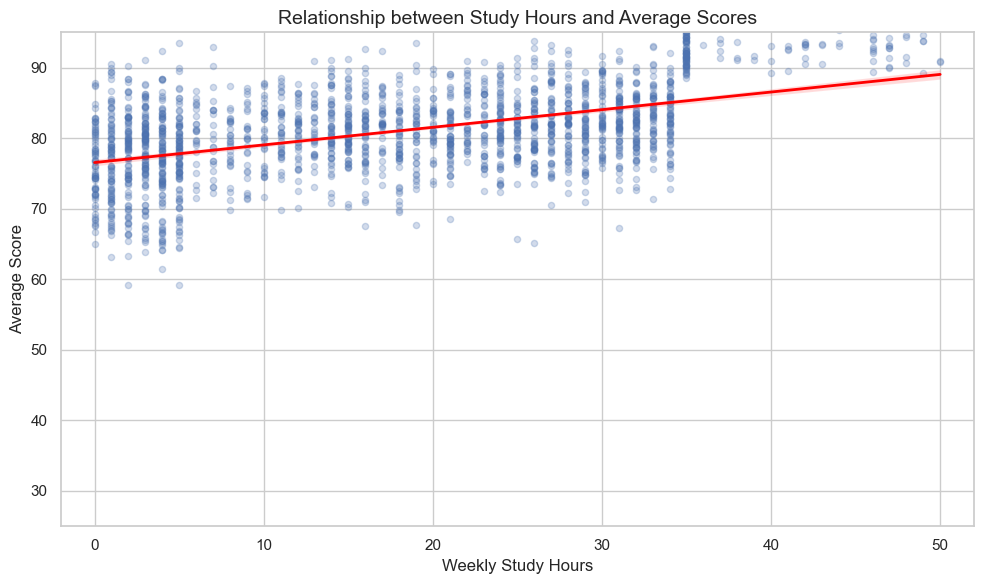

In [75]:
plt.figure(figsize=(10, 6))
scatter = sns.regplot(
    x='weekly_self_study_hours', 
    y='average_score', 
    data= df, 
    scatter_kws={'alpha': 0.25, 's': 20},  # Transparency and point size
    line_kws={'color': 'red', 'lw': 2},    # Line color and width
    ci= 95  # 95% confidence interval band
)

# Customize labels
plt.xlabel('Weekly Study Hours', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.title('Relationship between Study Hours and Average Scores', fontsize=14)
plt.xlim(-2, 52)
plt.ylim(25, 95)

plt.tight_layout()
plt.show()

#### Observation:
The scatterplot shows a clear positive correlation between weekly self-study hours and average academic performance. As study hours increase, the regression line trends upward, indicating higher expected scores.

Despite some scattered low-score outliers at both low and high study hours, the overall pattern suggests that students who study more tend to achieve higher average scores. The relationship is not extremely strong, but it is consistently positive and meaningful.

#### 4.2.4 Extracurricular activities vs scores

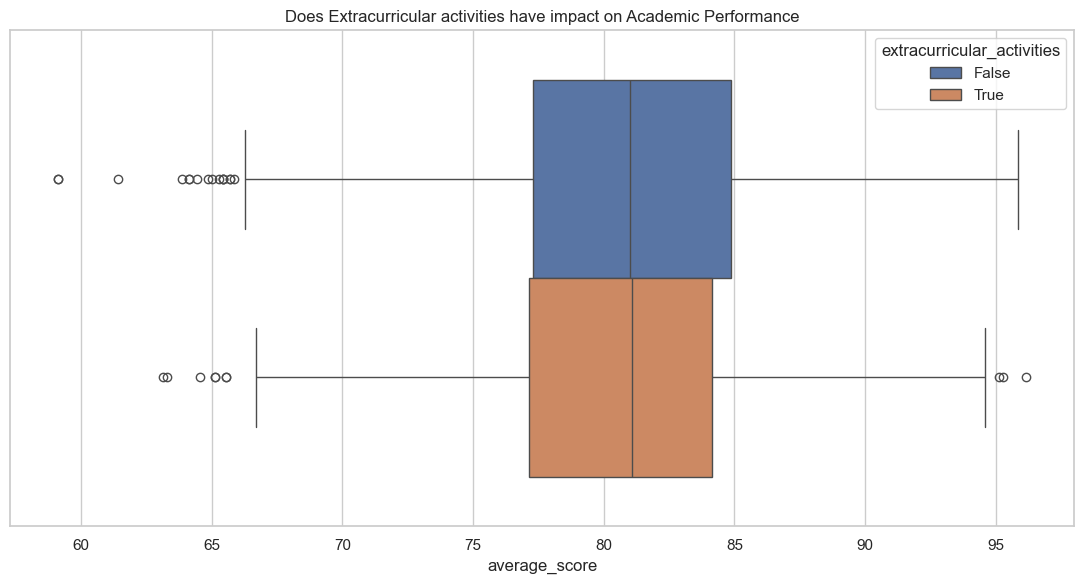

In [78]:
plt.figure(figsize=(11,6))
sns.boxplot(data= df, x='average_score', hue='extracurricular_activities')
plt.title("Does Extracurricular activities have impact on Academic Performance")
plt.tight_layout()
plt.show()

#### Observation:
The boxplot indicates no significant difference in average academic performance between students who participate in extracurricular activities and those who do not.

Both groups exhibit similar medians and overlapping interquartile ranges, suggesting that extracurricular involvement neither strongly benefits nor harms academic scores in this dataset.

Although a few outliers appear in both groups, the central tendency remains nearly identical, indicating consistent performance regardless of extracurricular participation.

In [80]:
df.head(2)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,...,biology_score,english_score,geography_score,total_score,average_score,science_average,humanities_average,quant_average,performance_category,score_per_study_hour
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,...,63,80,87,574,82.00,84.33,82.67,83.0,Medium,20.50
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,...,90,88,90,640,91.43,95.33,88.00,93.0,High,13.33


#### 4.2.5 Absence Days vs Average Score

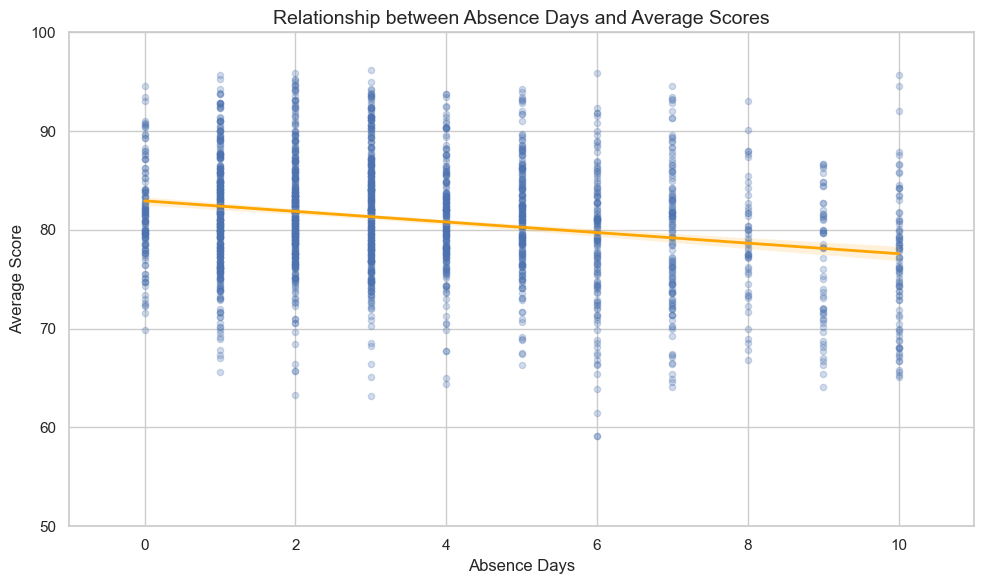

In [82]:
plt.figure(figsize=(10, 6))
scatter = sns.regplot(
    x='absence_days', 
    y='average_score', 
    data=df, 
    scatter_kws={'alpha': 0.25, 's': 20},
    line_kws={'color': 'orange', 'lw': 2},
    ci=95
)

plt.xlabel('Absence Days', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.title('Relationship between Absence Days and Average Scores', fontsize=14)

# Limit x-axis to actual data range
plt.xlim(-1, 11)

plt.ylim(50, 100)
plt.tight_layout()
plt.show()

#### Observation:
The scatterplot shows a clear negative correlation between absence days and academic performance. As the number of absence days increases, the regression line slopes downward, indicating that students with more absences tend to score lower on average.

While there is natural variability and some scattered outliers, the overall pattern strongly suggests that consistent attendance is associated with better academic outcomes, whereas frequent absences are linked to lower performance.

#### 4.2.6 Performance Category vs Behavioral Factors

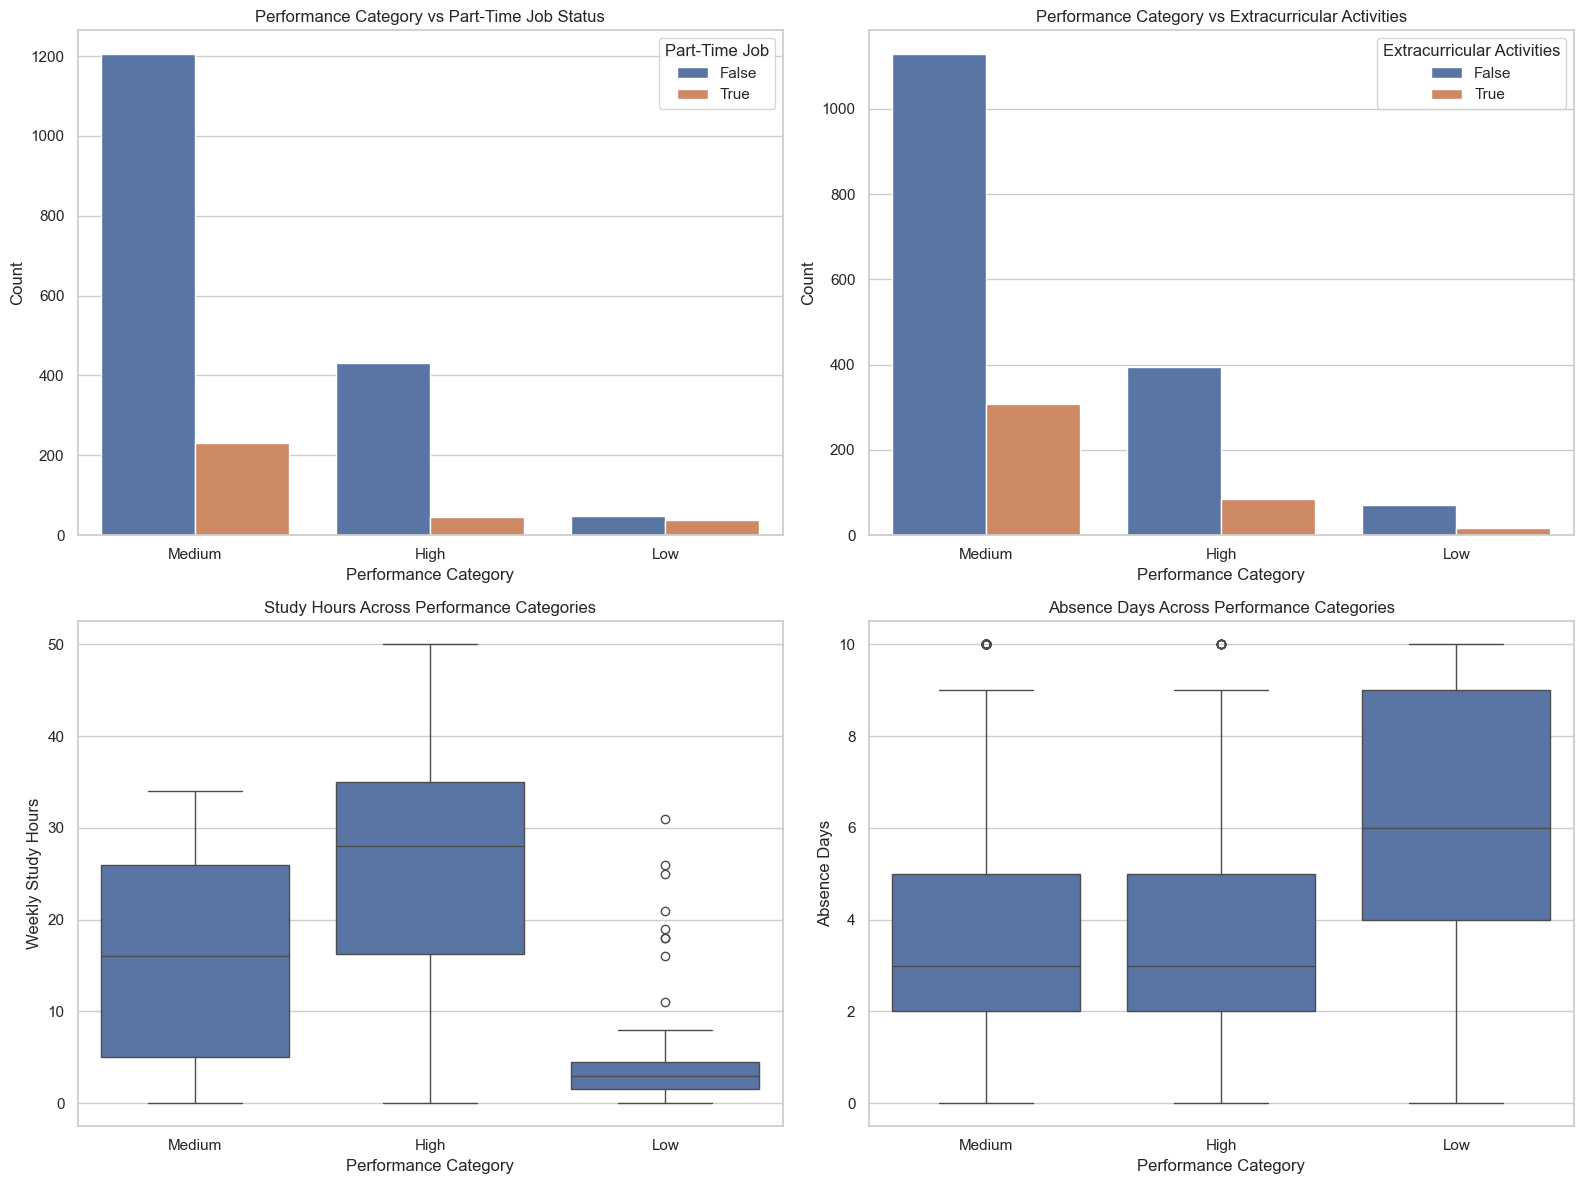

In [85]:
plt.figure(figsize=(16, 12))

# 1️⃣ Performance Category vs Part-Time Job
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='performance_category', hue='part_time_job')
plt.title("Performance Category vs Part-Time Job Status")
plt.xlabel("Performance Category")
plt.ylabel("Count")
plt.legend(title="Part-Time Job")

# 2️⃣ Performance Category vs Extracurricular Activities
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='performance_category', hue='extracurricular_activities')
plt.title("Performance Category vs Extracurricular Activities")
plt.xlabel("Performance Category")
plt.ylabel("Count")
plt.legend(title="Extracurricular Activities")

# 3️⃣ Study Hours Across Performance Categories
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='performance_category', y='weekly_self_study_hours')
plt.title("Study Hours Across Performance Categories")
plt.xlabel("Performance Category")
plt.ylabel("Weekly Study Hours")

# 4️⃣ Absence Days Across Performance Categories
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='performance_category', y='absence_days')
plt.title("Absence Days Across Performance Categories")
plt.xlabel("Performance Category")
plt.ylabel("Absence Days")

plt.tight_layout()
plt.show()

#### Observation:
##### Performance Category vs Part-Time Job

High performers are predominantly students who do not work part-time, while medium and low performers include a noticeably higher proportion of part-time workers. This indicates that part-time work is associated with slightly reduced academic performance.

##### Performance Category vs Extracurriculars

The distribution is similar across categories, indicating that extracurricular involvement does not significantly impact academic performance in this dataset.

##### Study Hours vs Performance Category

High performers study the most, with higher medians and tighter distribution. Medium performers fall in the middle, while low performers show the lowest and most inconsistent study hours. This supports a positive relationship between study effort and academic success.

##### Absence Days vs Performance Category

High performers have the fewest absence days, while medium and low performers exhibit higher and more variable absence levels. This shows that consistent attendance is strongly associated with better academic outcomes.

## Step 5: Multivariate Analysis

### 5.1 Correlation Matrix

In [120]:
corr_matrix = df[['absence_days','weekly_self_study_hours',
                   'math_score','history_score','physics_score',
                   'chemistry_score','biology_score','english_score',
                   'geography_score','total_score','average_score',
                   'science_average','humanities_average','quant_average'
                  ]].corr()

corr_matrix

,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score,science_average,humanities_average,quant_average
absence_days,1.000000,-0.286086,-0.237072,-0.128159,-0.136419,-0.084029,-0.090554,-0.084861,-0.002942,-0.232868,-0.232861,-0.159554,-0.117050,-0.251750
weekly_self_study_hours,-0.286086,1.000000,0.393569,0.276231,0.202120,0.201340,0.190481,0.247796,0.153622,0.501520,0.501507,0.305953,0.360899,0.402071
math_score,-0.237072,0.393569,1.000000,0.147247,0.115719,0.127131,0.081298,0.134831,0.049672,0.508116,0.508107,0.166076,0.177500,0.762435
history_score,-0.128159,0.276231,0.147247,1.000000,0.048478,0.121498,0.088502,0.147193,0.065751,0.486900,0.486898,0.133726,0.665168,0.132747
physics_score,-0.136419,0.202120,0.115719,0.048478,1.000000,0.126163,0.132280,0.054314,0.103126,0.472104,0.472092,0.632707,0.107623,0.730946
chemistry_score,-0.084029,0.201340,0.127131,0.121498,0.126163,1.000000,0.119992,0.068341,0.065430,0.492216,0.492227,0.634275,0.136366,0.169533
biology_score,-0.090554,0.190481,0.081298,0.088502,0.132280,0.119992,1.000000,0.074227,0.106526,0.502391,0.502384,0.670244,0.141971,0.142028
english_score,-0.084861,0.247796,0.134831,0.147193,0.054314,0.068341,0.074227,1.000000,0.072250,0.451550,0.451569,0.101961,0.642137,0.128018
geography_score,-0.002942,0.153622,0.049672,0.065751,0.103126,0.065430,0.106526,0.072250,1.000000,0.415929,0.415930,0.142301,0.581222,0.101308
total_score,-0.232868,0.501520,0.508116,0.486900,0.472104,0.492216,0.502391,0.451550,0.415929,1.000000,1.000000,0.756995,0.717482,0.656650


### 5.2 Correlation Heatmap

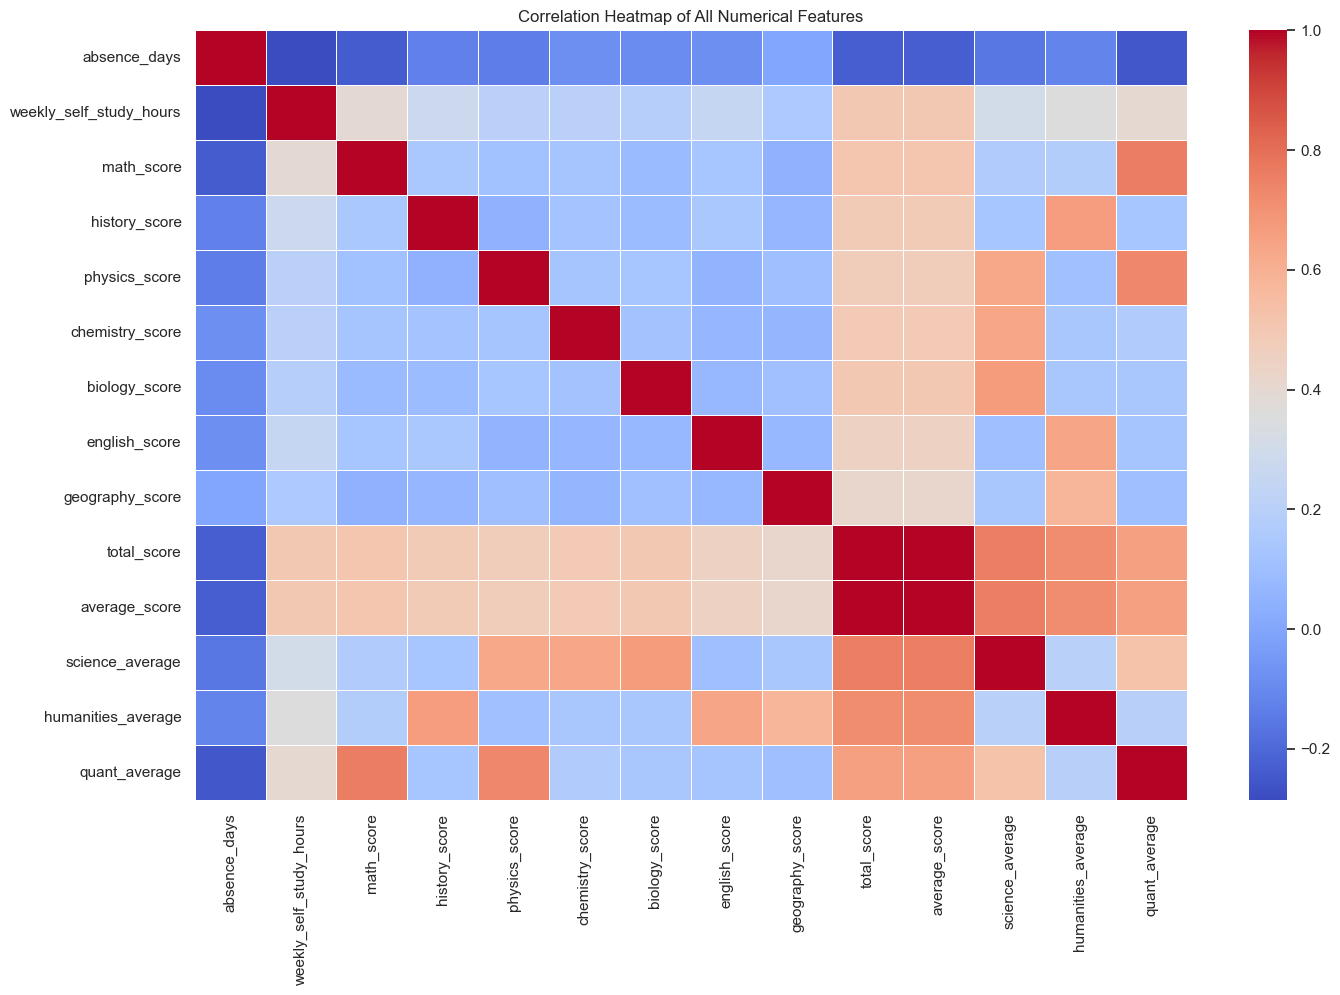

In [123]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of All Numerical Features")
plt.show()

#### Observation:
The correlation heatmap provides a high-level overview of how all numerical variables relate to each other simultaneously. It reveals structural patterns in student performance and validates the behavioral and engineered variables created earlier.

##### 1. Strong Subject Clustering (Academic Domain Patterns)

The heatmap shows clear subject-wise clusters:

###### Science Cluster

Physics, Chemistry, and Biology have strong positive correlations with each other.

Their correlation values are significantly higher than cross-domain subjects.

###### Humanities Cluster

History, English, and Geography also correlate strongly among themselves.

###### quant Cluster

Math shows moderate correlation with both clusters, indicating it behaves more like a general aptitude subject.

##### Insight:

Students who perform well in one science subject tend to do well in the others.
Similarly, humanities subjects show consistent interconnected performance patterns.

##### 2. Performance Metrics Correlate Strongly with All Subjects

average_score and total_score have strong positive correlations with all seven subjects, confirming they accurately summarize overall academic performance.

total_score and average_score have a perfect correlation (1.0) because total is a linear transformation of the average.

##### Insight:

These metrics are reliable indicators of overall performance; however, for modeling purposes, using both is redundant.

##### 3. Behavioral Factors Show Expected Correlations
###### Weekly Self-Study Hours

Positively correlated with:

math_score

physics_score

chemistry_score

average_score

total_score

##### Insight:

Students who study more hours per week tend to score higher across subjects, confirming earlier bivariate findings.

###### Absence Days

Negatively correlated with:

all subject scores

total_score

average_score

##### Insight:

Higher absenteeism is associated with lower academic performance.

This multivariate evidence strengthens the conclusion that attendance meaningfully impacts academic achievement.

##### 4. Feature Engineering Validation

Our engineered features behave logically and correctly:

Science Average

Strongly correlated with physics, chemistry, biology.

Humanities Average

Strongly correlated with history, geography, english.

Quant Average

Strongly correlated with math and physics.

##### Insight:

The engineered metrics accurately summarize related subject groups and enhance interpretability.
This makes them valuable for further modeling or performance segmentation.

#### Overall Multivariate Conclusion

The multivariate analysis reveals clear academic clusters, meaningful behavioral influences, and validated engineered features. Study hours and attendance show moderate but clear relationships with performance, while science and humanities subjects form natural correlation groups. The dataset is structurally sound, with no multicollinearity issues except between total and average scores (expected).

These insights provide a comprehensive understanding of how various factors interact to shape academic performance and set a strong foundation for further modeling or decision-making.

## Step 6: Key Insights

### 6.1 Key Insights on Student Demographics & Behavior
#### 1. Gender Distribution

Gender is almost perfectly balanced in the dataset (≈50:50).

No performance difference was observed between males and females.

#### 2. Part-Time Employment

Only ~16% of students work part-time.

Part-time students show:

Lower median scores

Greater variability in performance

##### Insight:
Part-time employment is associated with slightly lower academic outcomes, likely due to time constraints.

#### 3. Extracurricular Activities

~20% of students participate.

No significant difference in performance compared to non-participants.

##### Insight:
Extracurricular involvement does not negatively or positively impact academic results.

#### 4. Attendance (Absence Days)

Absences range from 0–10, mostly clustered between 1–4 days.

Higher absence days correlate with lower average scores.

##### Insight:
Strong attendance is a meaningful factor in academic success.

#### 5. Weekly Study Hours

Study hours range widely (0–50 hours).

Stronger performers study more consistently.

Positive correlation observed between study time and scores.

##### Insight:
Study habits significantly influence performance.

### 6.2 Subject-Wise Academic Performance Patterns

#### 1. Science Subjects Cluster Together

Physics, Chemistry, Biology show strong positive correlations.

High performers tend to excel across all science subjects.

#### 2. Humanities Subjects Form Their Own Cluster

History, English, Geography correlate strongly with each other.

#### 3. Math Shows Middle-Position Correlation

Moderately correlated with both science and humanities.

##### Insight:
Students tend to perform consistently within academic domains.

### 6.3 Insights from Feature Engineering

Our engineered features (science_average, humanities_average, quant_average, total_score, average_score) behave exactly as expected:

Science_average aligns with science subjects

Humanities_average aligns strongly with humanities

Quant_average aligns with math + physics

Total_score and average_score are perfectly correlated

##### Insight:
Feature engineering was valid and helpful for deeper interpretation.

### 6.4 Behavioral Factors vs Performance Category
#### High Performers:

Highest study hours

Lowest absence days

Mostly non–part-time workers

#### Medium Performers:

Moderate study hours

Moderate attendance

#### Low Performers:

Lowest study hours

Highest absence days

More likely to work part-time

##### Insight:
Lifestyle and study habits influence performance more than demographic factors.

### 6.5 Overall Conclusion

Academic performance is driven more by behavioral factors (study habits, attendance, workload balance) than by demographics (gender, extracurriculars).

Students who study more consistently and maintain better attendance achieve stronger academic results across all subjects.

Part-time work is associated with slightly lower performance, suggesting that time allocation plays a key role.

Subject clusters show meaningful patterns, with science and humanities forming natural groups of coherence.